**Let's Start**

Importing the necessary libraries and importing the data (I will import the libraries on "as and when basis")

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
credit_risk = pd.read_csv("C:/Spring25/Project/credit_risk_dataset.csv")
credit_risk.shape
credit_risk.head()


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ghosh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ghosh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ghosh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ghosh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Data Visualisation**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [4]:
data=credit_risk.copy()
data = data[data['person_age'] < 100]

X = data.drop('loan_status', axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

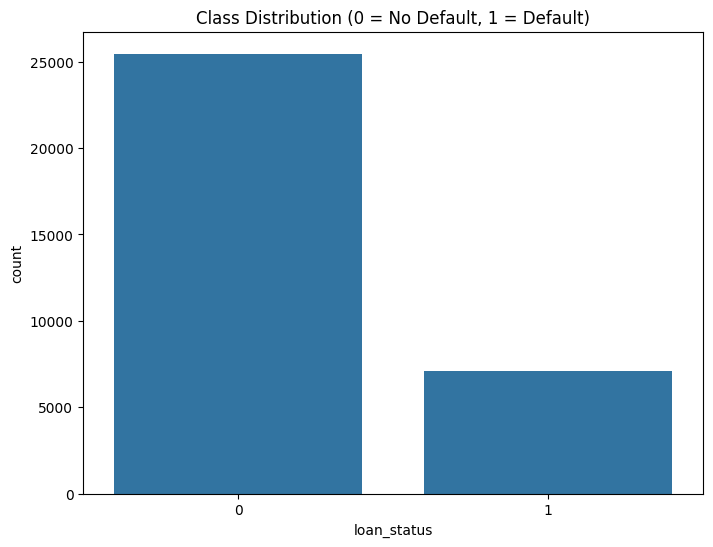

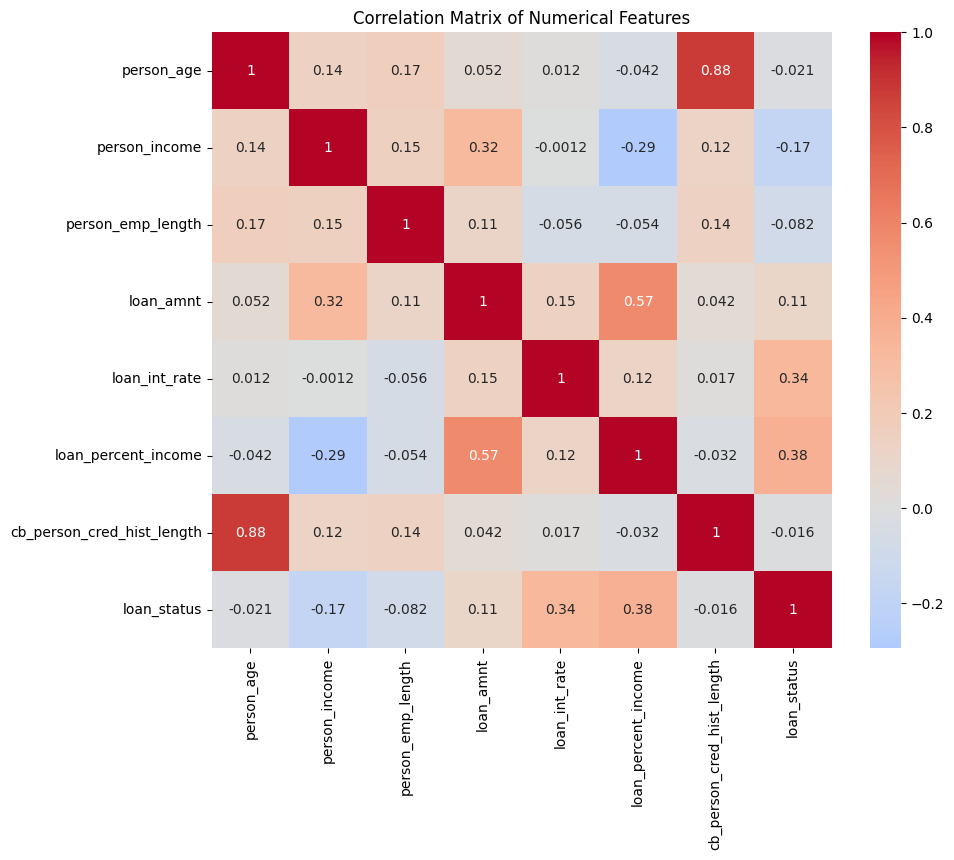

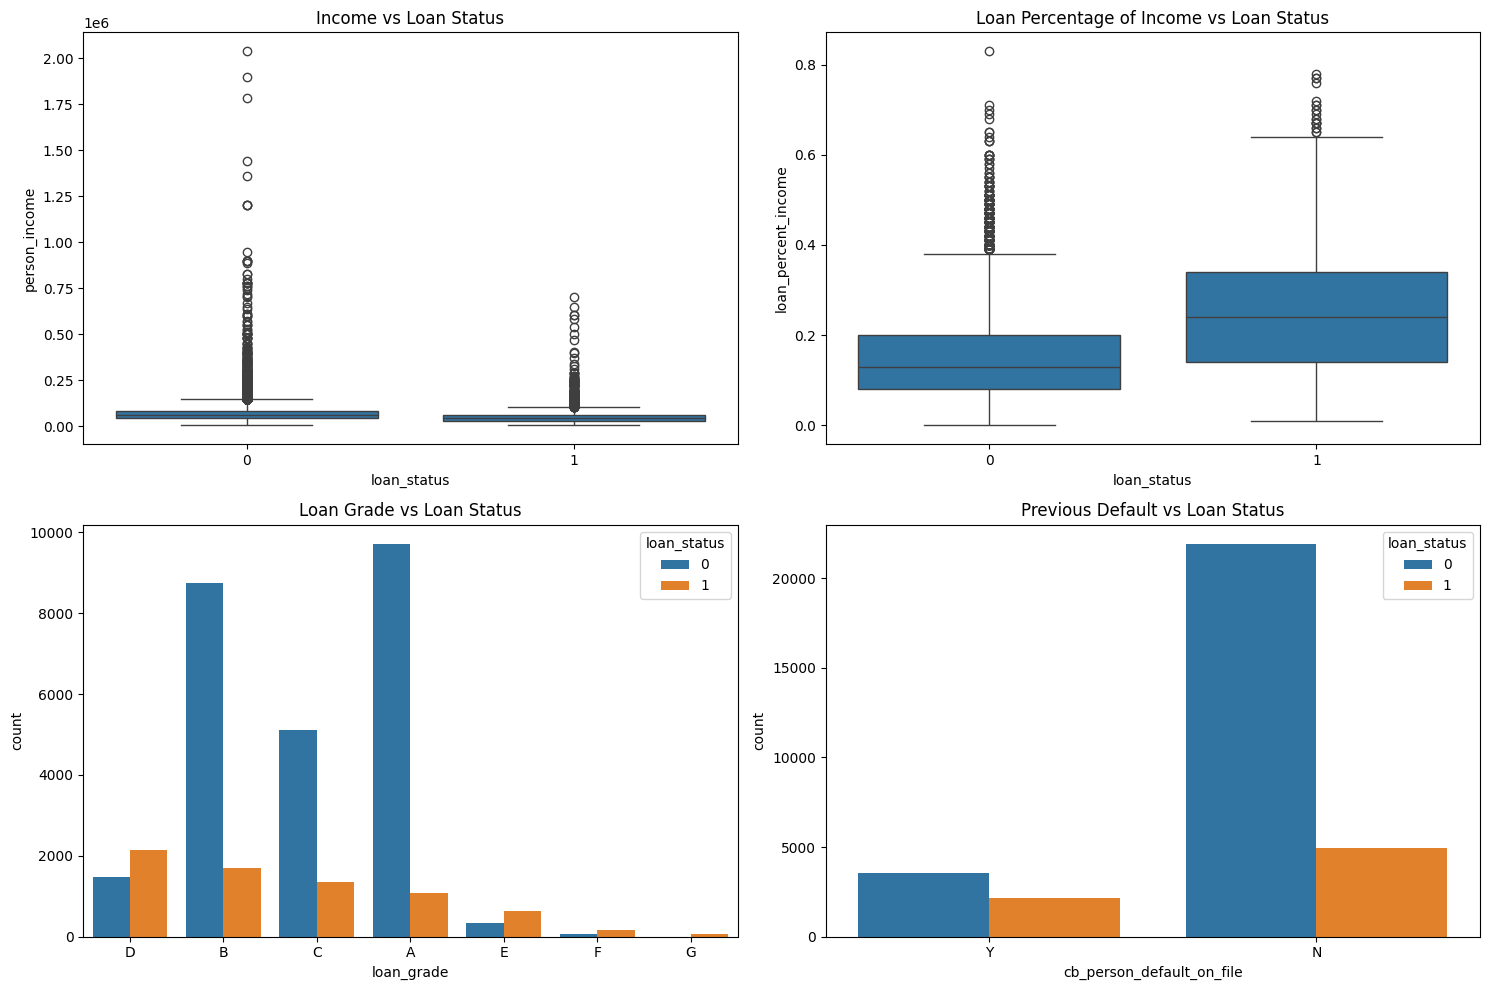

In [8]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution (0 = No Default, 1 = Default)')
plt.show()
plt.figure(figsize=(10, 8))
numeric_data = data[numeric_features + ['loan_status']]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='loan_status', y='person_income', data=data)
plt.title('Income vs Loan Status')
plt.subplot(2, 2, 2)
sns.boxplot(x='loan_status', y='loan_percent_income', data=data)
plt.title('Loan Percentage of Income vs Loan Status')

plt.subplot(2, 2, 3)
sns.countplot(x='loan_grade', hue='loan_status', data=data)
plt.title('Loan Grade vs Loan Status')

plt.subplot(2, 2, 4)
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=data)
plt.title('Previous Default vs Loan Status')
plt.tight_layout()
plt.show()

**Actual work begins**

**Outlier Treatment**

In [9]:
credit_risk.pivot_table(index="person_age",columns='loan_status', values='person_income',aggfunc='count').reset_index().sort_values(by='person_age', ascending=False)

loan_status,person_age,0,1
57,144,3.0,NaN
56,123,2.0,NaN
55,94,1.0,NaN
54,84,1.0,NaN
53,80,1.0,NaN
52,78,1.0,NaN
51,76,1.0,NaN
50,73,3.0,NaN
49,70,5.0,2.0
48,69,5.0,NaN


In [10]:
credit_risk2=credit_risk[credit_risk['person_age']<70]
credit_risk2.reset_index(drop=True,inplace=True)
credit_risk2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
credit_risk2.shape

(32561, 12)

In [12]:
credit_risk2.pivot_table(index="person_emp_length",columns='loan_status', values='person_income',aggfunc='count').reset_index().sort_values(by='person_emp_length', ascending=False)

loan_status,person_emp_length,0,1
34,123.0,1.0,1.0
33,38.0,1.0,NaN
32,34.0,NaN,1.0
31,31.0,4.0,NaN
30,30.0,1.0,1.0
29,29.0,NaN,1.0
28,28.0,3.0,NaN
27,27.0,4.0,1.0
26,26.0,5.0,1.0
25,25.0,8.0,NaN


In [13]:
person_emp_rmvd=credit_risk2[credit_risk2["person_emp_length"]<47]
person_emp_rmvd.reset_index(drop=True,inplace=True)
person_emp_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [14]:
person_emp_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31665.000000,3.166500e+04,31665.000000,31665.000000,28621.000000,31665.000000,31665.000000,31665.000000
mean,27.709743,6.649461e+04,4.781462,9660.888994,11.040016,0.215474,0.169622,5.800916
std,6.132880,5.277661e+04,4.028706,6334.933174,3.229462,0.411158,0.106278,4.041164
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,69.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Null Value Treatment**

In [15]:
person_emp_rmvd.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3044
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
credit_risk2=person_emp_rmvd.copy()
credit_risk2.fillna({'loan_int_rate':credit_risk2['loan_int_rate'].median()},inplace= True)
credit_risk2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [17]:
credit_risk2.groupby('loan_status').count()['person_age']

loan_status
0    24842
1     6823
Name: person_age, dtype: int64

In [18]:
credit_risk2.groupby('loan_grade').count()['person_age']

loan_grade
A    10363
B    10179
C     6317
D     3554
E      952
F      236
G       64
Name: person_age, dtype: int64

In [19]:
credit_risk3=credit_risk2.drop('loan_grade', axis=1) #NOT IMPORTANT FOR OUR ANALYSIS

In [20]:
credit_risk3.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


**Categorical Feature Treatment**

In [21]:

treated_data=credit_risk3.copy()
treated_data.groupby('person_home_ownership').count()['person_age']

person_home_ownership
MORTGAGE    13086
OTHER         107
OWN          2410
RENT        16062
Name: person_age, dtype: int64

**ONE-HOT ENCODING**

In [22]:
person_home_ownership=pd.get_dummies(treated_data['person_home_ownership'],drop_first=True).astype(int)
loan_intent=pd.get_dummies(treated_data['loan_intent'],drop_first=True).astype(int)
treated_data['cb_person_default_on_file_binary'] = np.where(treated_data['cb_person_default_on_file']=='Y',1,0)
person_home_ownership.head()

,OTHER,OWN,RENT
0,0,1,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,1,0


**Scaling of data #STANDARDIZATION**

In [23]:
data_to_scale=treated_data.drop(['person_home_ownership','loan_intent','loan_status','cb_person_default_on_file','cb_person_default_on_file_binary'],axis=1)
data_to_scale.head()
data_to_scale.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [25]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data,columns=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
scaled_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.094078,-1.078044,0.054246,-1.367185,0.034131,-0.655105,-0.940565
1,-0.441845,-1.078044,-0.938644,-0.656827,0.597594,3.767318,-0.693107
2,-0.767962,-0.018846,-0.193977,3.999965,1.366250,3.390942,-0.940565
3,-0.604904,-0.229170,0.798914,3.999965,1.053576,3.579130,-0.445650
4,-1.094078,-1.072359,-0.690422,-1.130399,-1.268675,0.756307,-0.940565


In [26]:
scaled_data_combined=pd.concat([scaled_df,person_home_ownership,loan_intent],axis=1)
scaled_data_combined.shape
treated_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


In [27]:
scaled_data_combined['cb_person_default_on_file']= treated_data['cb_person_default_on_file_binary']
scaled_data_combined['loan_status']= treated_data['loan_status']

In [28]:
scaled_data_combined.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file,loan_status
0,-1.094078,-1.078044,0.054246,-1.367185,0.034131,-0.655105,-0.940565,0,1,0,1,0,0,0,0,0,0
1,-0.441845,-1.078044,-0.938644,-0.656827,0.597594,3.767318,-0.693107,0,0,0,0,0,1,0,0,0,1
2,-0.767962,-0.018846,-0.193977,3.999965,1.366250,3.390942,-0.940565,0,0,1,0,0,1,0,0,0,1
3,-0.604904,-0.229170,0.798914,3.999965,1.053576,3.579130,-0.445650,0,0,1,0,0,1,0,0,1,1
4,-1.094078,-1.072359,-0.690422,-1.130399,-1.268675,0.756307,-0.940565,0,1,0,0,0,0,0,1,0,1


In [29]:
scaled_data_combined.groupby('loan_status').count()['person_emp_length']

loan_status
0    24842
1     6823
Name: person_emp_length, dtype: int64

In [30]:
target = scaled_data_combined['loan_status']
features = scaled_data_combined.drop('loan_status',axis=1)

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

!pip install imblearn
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE()

In [33]:
balanced_features, balanced_target = smote.fit_resample(features,target)


In [34]:
balanced_features.shape

(49684, 16)

In [35]:
balanced_target_df = pd.DataFrame({'target': balanced_target})
balanced_target_df.groupby('target').size()

target
0    24842
1    24842
dtype: int64

**Model Training**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test=train_test_split(balanced_features, balanced_target,test_size=0.3,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [38]:
logit.fit(x_train,y_train)

LogisticRegression()

In [39]:
logit.score(x_train,y_train)

0.7850365173385474

In [40]:
logit_prediction= logit.predict(x_test)
logit_prediction

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
print(classification_report(y_test,logit_prediction))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      7480
           1       0.78      0.78      0.78      7426

    accuracy                           0.78     14906
   macro avg       0.78      0.78      0.78     14906
weighted avg       0.78      0.78      0.78     14906



In [42]:
print(logit.coef_)

[[-0.05900006  0.06016149 -0.04830526 -0.66643035  0.9911538   1.41144345
   0.02240555 -0.71871593 -2.10396466  0.4705119  -1.17470032 -0.35828374
  -0.49141747 -1.00245609 -1.54067453  0.08799672]]


In [43]:
features_importance_using_logit= pd.DataFrame({'features':balanced_features.columns,'logit_importance': logit.coef_[0]})
features_importance_using_logit.head()
features_importance_using_logit.sort_values(by='logit_importance',ascending=False)

,features,logit_importance
5,loan_percent_income,1.411443
4,loan_int_rate,0.991154
9,RENT,0.470512
15,cb_person_default_on_file,0.087997
1,person_income,0.060161
6,cb_person_cred_hist_length,0.022406
2,person_emp_length,-0.048305
0,person_age,-0.059000
11,HOMEIMPROVEMENT,-0.358284
12,MEDICAL,-0.491417


**RANDOM FOREST**

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [45]:
rf.score(x_train,y_train)

1.0

In [46]:
rf_prediction=rf.predict(x_test)
rf_prediction

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [47]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7480
           1       0.96      0.90      0.93      7426

    accuracy                           0.93     14906
   macro avg       0.93      0.93      0.93     14906
weighted avg       0.93      0.93      0.93     14906



In [48]:
rf.feature_importances_


array([0.06154562, 0.148526  , 0.07394104, 0.07931674, 0.20996748,
       0.20933298, 0.06016239, 0.00047943, 0.020628  , 0.0459643 ,
       0.01506144, 0.01555215, 0.0092483 , 0.01315117, 0.01767104,
       0.01945191])

In [49]:
feature_importance_using_Random_Forest= pd.DataFrame({'features':balanced_features.columns,'feature_importance':rf.feature_importances_ })


In [50]:
feature_importance_using_Random_Forest.head()
feature_importance_using_Random_Forest.sort_values(by='feature_importance',ascending=False)

,features,feature_importance
4,loan_int_rate,0.209967
5,loan_percent_income,0.209333
1,person_income,0.148526
3,loan_amnt,0.079317
2,person_emp_length,0.073941
0,person_age,0.061546
6,cb_person_cred_hist_length,0.060162
9,RENT,0.045964
8,OWN,0.020628
15,cb_person_default_on_file,0.019452


**XGBoost Model**

In [52]:
!pip install xgboost
from xgboost import XGBClassifier


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ghosh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 495.5 kB/s eta 0:05:03
   ---------------------------------------- 0.1/150.0 MB 1.1 MB/s eta 0:02:23
   ---------------------------------------- 0.3/150.0 MB 2.2 MB/s eta 0:01:08
   ---------------------------------------- 0.6/150.0 MB 3.2 MB/s eta 0:00:48
   ---------------------------------------- 0.9/150.0 MB 3.9 MB/s eta 0:00:38
   ---------------------------------------- 1.4/150.0 MB 5.1 MB/s eta 0:00:30
   ---------------------------------------- 1.8/150.0 MB 5.7 MB/s eta 0:00:26
    --------------------------------------- 2.3/150.0 MB 6.0 MB/s eta 0:00:25
    --------------------------------------- 2.8/150.0 MB 6.5 MB/s eta 0:00:23
    --------------------------------------- 3.5/150.0 MB 7.4 MB/s eta 0:00:20
    --------------------------------------- 3.7/150.0 MB 7.4 MB/s eta 0:00:2

In [53]:
xgb_model=XGBClassifier(tree_method='exact')

In [54]:
xgb_model.fit(x_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
xgb_model.score(x_train,y_train.values.ravel())

0.9673931795962966

In [56]:
XGB_Prediction=xgb_model.predict(x_test,)
XGB_Prediction

array([1, 0, 0, ..., 0, 1, 1])

In [57]:
print(classification_report(y_test,XGB_Prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7480
           1       0.98      0.92      0.95      7426

    accuracy                           0.95     14906
   macro avg       0.95      0.95      0.95     14906
weighted avg       0.95      0.95      0.95     14906



In [58]:
xgb_model.feature_importances_

array([0.04106946, 0.03768789, 0.04857947, 0.01067851, 0.07695627,
       0.12690656, 0.07234082, 0.00895401, 0.18675883, 0.10577391,
       0.0516874 , 0.05757235, 0.01231341, 0.05318712, 0.09113207,
       0.01840183], dtype=float32)

**Training a Neural Network**

In [63]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', 
                        solver='adam', max_iter=500, random_state=42)
nn_model.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [64]:
y_pred_nn = nn_model.predict(x_test)

In [65]:
print(classification_report(y_test, y_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7480
           1       0.88      0.84      0.86      7426

    accuracy                           0.86     14906
   macro avg       0.86      0.86      0.86     14906
weighted avg       0.86      0.86      0.86     14906

Accuracy: 0.8632094458607272


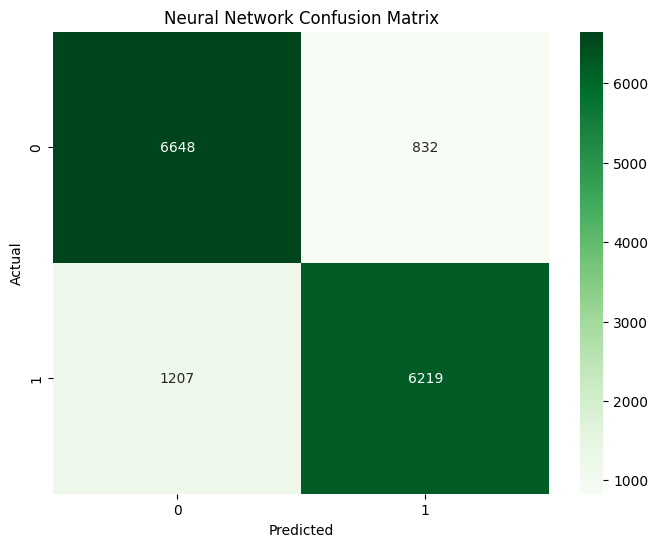

In [67]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greens')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
feature_importance_usingXGB = pd.DataFrame({'Features':balanced_features.columns,'Features_Importance':xgb_model.feature_importances_})
feature_importance_usingXGB.sort_values(by='Features_Importance',ascending= False)
feature_importance_usingXGB.head()

,Features,Features_Importance
0,person_age,0.041069
1,person_income,0.037688
2,person_emp_length,0.048579
3,loan_amnt,0.010679
4,loan_int_rate,0.076956


In [76]:
feature_importance = pd.concat([features_importance_using_logit,feature_importance_using_Random_Forest,feature_importance_usingXGB],axis=1)
feature_importance

,features,logit_importance,features,feature_importance,Features,Features_Importance
0,person_age,-0.059000,person_age,0.061546,person_age,0.041069
1,person_income,0.060161,person_income,0.148526,person_income,0.037688
2,person_emp_length,-0.048305,person_emp_length,0.073941,person_emp_length,0.048579
3,loan_amnt,-0.666430,loan_amnt,0.079317,loan_amnt,0.010679
4,loan_int_rate,0.991154,loan_int_rate,0.209967,loan_int_rate,0.076956
5,loan_percent_income,1.411443,loan_percent_income,0.209333,loan_percent_income,0.126907
6,cb_person_cred_hist_length,0.022406,cb_person_cred_hist_length,0.060162,cb_person_cred_hist_length,0.072341
7,OTHER,-0.718716,OTHER,0.000479,OTHER,0.008954
8,OWN,-2.103965,OWN,0.020628,OWN,0.186759
9,RENT,0.470512,RENT,0.045964,RENT,0.105774


In [77]:
XGB_Prediction_df = pd.DataFrame({'test_indices_XGB':x_test.index,'XGB_pred': XGB_Prediction})
Random_Forest_Pred = pd.DataFrame({'test_indices_RF':x_test.index,'Random_Forest_Pred': rf_prediction})
Logit_Prediction_df = pd.DataFrame({'test_indices_LOGIT':x_test.index,'Logit_Prediction_df': logit_prediction})


In [78]:
merged_with_XGB = credit_risk3.merge(XGB_Prediction_df,left_index=True,right_on = 'test_indices_XGB',how='left')

merged_with_XGB.shape

(31665, 13)

In [79]:
merged_with_RF = merged_with_XGB.merge(Random_Forest_Pred,left_index=True,right_on = 'test_indices_RF',how='left')
merged_with_RF.shape


(31665, 15)

In [80]:
merged_with_original = merged_with_RF.merge(Logit_Prediction_df,left_index=True,right_on = 'test_indices_LOGIT',how='left')
merged_with_original.shape

(31665, 17)

In [81]:
merged_with_original.dropna(inplace=True)
merged_with_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_XGB,XGB_pred,test_indices_RF,Random_Forest_Pred,test_indices_LOGIT,Logit_Prediction_df
10275.0,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,1,1.0,9826.0,1.0,8501.0,1.0
1521.0,22,80000,RENT,3.0,PERSONAL,33950,14.54,1,0.42,Y,4,23,1.0,12498.0,0.0,4421.0,0.0
14859.0,24,55000,RENT,4.0,HOMEIMPROVEMENT,25000,10.99,1,0.45,Y,4,150,1.0,5522.0,1.0,2195.0,0.0
13259.0,25,200000,MORTGAGE,9.0,PERSONAL,23050,14.35,0,0.12,N,3,182,0.0,7514.0,0.0,431.0,0.0
14885.0,22,185000,RENT,4.0,MEDICAL,25000,11.36,0,0.14,N,2,226,0.0,10649.0,0.0,14667.0,0.0


In [82]:
Final_Data_With_Pred = merged_with_original.drop(['test_indices_XGB','test_indices_RF','test_indices_LOGIT'],axis=1)

**Exporting the data for PowerBI Dashboard creation**

In [85]:
!pip install openpyxl
Final_Data_With_Pred.to_excel(r"C:\Spring25\Project\Predicted_values.xlsx",index=False)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ghosh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------------------------ --------------- 153.6/250.9 kB 2.3 MB/s eta 0:00:01
   ----------------------------------- ---- 225.3/250.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.9 MB/s eta 0:00:00
